# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,31714,12319,11757,287,3881,2931
1,6269,1095,1980,3860,609,2162
2,16225,1825,1765,853,170,1067



Value of each sample in Percentage: 

     Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
12    94.0  90.0     79.0    11.0              75.0          90.0
50    41.0  15.0     20.0    77.0              44.0          81.0
150   74.0  29.0     18.0    30.0              15.0          55.0


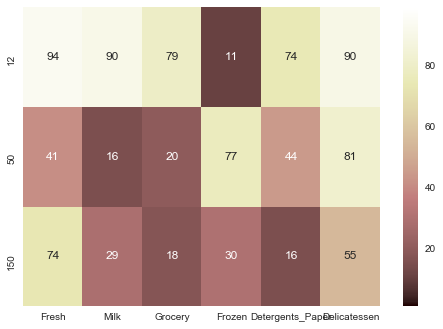

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [12, 50, 150]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

print "\nValue of each sample in Percentage: \n"
pcts = 100. * data.rank(axis=0, pct=True).iloc[indices].round(decimals=2)
print pcts

import seaborn as sns
percentiles = data.rank(pct=True)
percentiles = 100*percentiles.round(decimals=3)
percentiles = percentiles.iloc[indices]
sns.heatmap(percentiles, vmin=1, vmax=99, annot=True, cmap="pink")

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:** In First one (index=12) the customers is heavily spening on Fresh food, Milk, Grocery, Detergents paper and Delicatessen, almost all items are purchased above 75 percent. But, very few on Frozen stuff. So, it seems like some restaurant.

In Second one (index=50) the customers are heavily spending on Frozen food and Delicatessen. But not much on other stuff. It seems more like some cold storage or meat shop, where the food is required to keep frozed to keep it fresh.

In Third one (index=150) the customers are only spending on Fresh Food and little bit on Delicatessen. So it seems more like some Greengrocery store, which sells a lot of fruits and vegetables.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [19]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

    
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
grocery_array = data['Grocery']
new_data = pd.DataFrame(data.drop(['Grocery'], 1))

# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data, grocery_array,
                                                    test_size=0.25, random_state=10)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print "Score Is: ", score 


Score Is:  0.729544365246


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:** I attempt to predict Grocery and it turn out to be the feature with highest score. Its prediction score is 0.72 and 0.54 for Detergent Paper. Since its value can be predicted or can be easily derived from other features.Hence,the values may not be necessary to identify the customers' spending habits.

The features like Fresh and Delicatessen failed to fit the model. 

The features like Milk and Frozen have the score of 0.23 and 0.096 respectively. They do not have good correlations with the other features and can be necessary for identifying customers' spending habits.

The score of each feature is:

Fresh: - 0.463299843174 

Milk: 0.230929956286

Grocery:  0.729544365246

Frozen:  0.0960549454717

Detergents Paper: 0.541087989968

Delicatessen: - 10.5311275951


### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

D:\Anaconda2.7\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


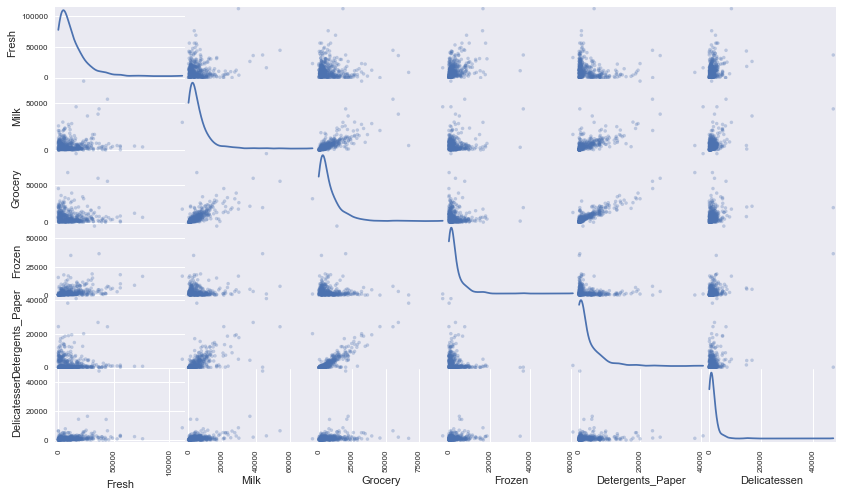

In [5]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:** The features are correlated when one feature seems to be dependent (or related) on the other. Grocery and Detergent Paper appears to exhibit good correlation, the data points of these two features somewhat follow a linear relationship. 

It confirms the suspicion about the relevance of the feature I attempted to predict becaue in my prediction above the customers are spending most on Grocery(72%) and then on Detergent Paper(54%), which seems quite accurate from the scatter plot above.

The data is not normally distributed. The distribution of data points seems to be skewed right/ towards to origin and doesn't follow the normal pattern.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

D:\Anaconda2.7\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


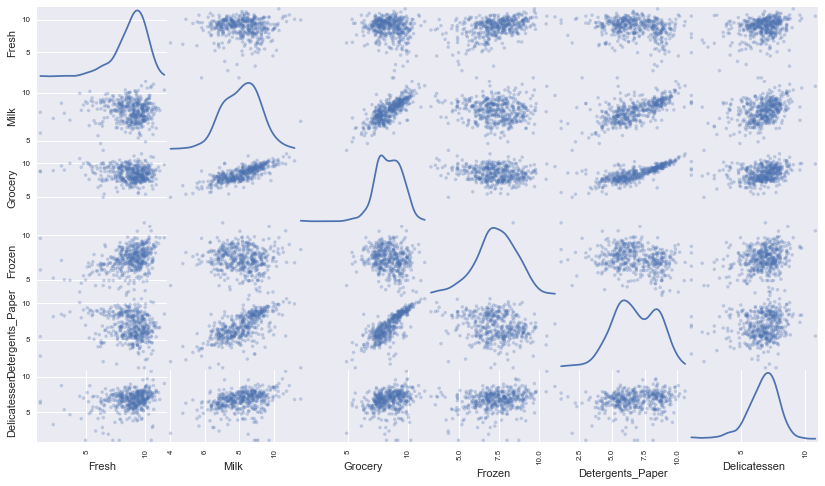

In [6]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [7]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10.364514,9.418898,9.372204,5.659482,8.263848,7.983099
1,8.743372,6.998510,7.590852,8.258422,6.411818,7.678789
2,9.694309,7.509335,7.475906,6.748760,5.135798,6.972606


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [8]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():

    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1)*1.5
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [65, 66, 75, 128, 154]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
    

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:** Outliers are the features whose values are lot higher or lower, compared to other features in the same data set. There are several data points in which I found outliers. Some of the data points I found with most outliers are:

65, 66, 75, 128 and 154. The data point 154 has the most outliers i.e. 3 (Milk, Grovery and Delicatessen)

Yes, I think these data points should be removed from the dataset. As there are only 5 major outliers, so removing them will only improve our overall estimation.



## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

Dimension 1    0.4430
Dimension 2    0.7068
Dimension 3    0.8299
Dimension 4    0.9311
Dimension 5    0.9796
Dimension 6    1.0000
Name: Explained Variance, dtype: float64


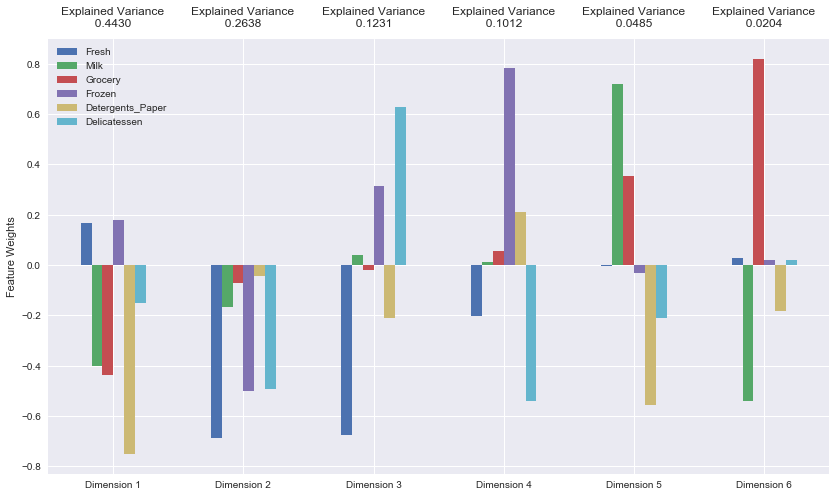

In [9]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6)
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

print pca_results['Explained Variance'].cumsum()

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:** How much variance in the data is explained in total by the first and second principal component:

Explained Variance of Dimension 1 and Dimension 2 

=  44.2% + 27.6%  
=  71.8%
                                                  
                                                  
Variance of First Four principal components 
= Dimension 1 + Dimension 2 + Dimension 3 + Dimension 4

  = 44.2% + 27.6% + 11.6% + 9.6%
      =  93%

(If you change the signs of the component(s), you do not change the variance that is contained in the first component. So, instead of focusing on the variables with positive weights, pay attention to the variables with large weights.)
  
Hence,

The First Component/ Dimension 1 shows that the people are spending most on Detergents Paper then on grocery and milk. But it didn't predict these features very well, so we need another component to help. It manage to predict Fresh and Frozen quite well. The component could represent some supermarket.

The Second Component shows that the people are spendin most on Fresh, Frozen and Delicatessen and littel on Milk, Grocery and Detergent Papers. Now as the value of Fresh and Frozen has changed in second component. Larger the value of  these features in Second Component, smaller it would be in Component One. The component could represent some grocery store.

The Third Component shows that the people are mainly spending on Fresh, Delicatessen and Frozen. It shows gain in value of Frozen and Delicatessen compare to second component. The component seems to be representing some food market which sells lots of fresh food and and some amount of frozen food as well.

The Fourth Component shows that the people are heavily spending on Frozen Food and then on Delicatessen. The value of Frozen seems to be higher than previous components. The component represents some frozen food market which sells fish/meat and other frozen items.



### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [10]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-2.2406,-1.2419,-1.0729,-1.9589,0.2160,-0.1782
1,1.1404,-0.6710,0.9823,0.0603,-1.1423,0.0055
2,1.9406,-0.2418,-0.2884,-1.2041,0.0917,-0.1492


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [11]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components = 2)
pca.fit(good_data)


# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [12]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-2.2406,-1.2419
1,1.1404,-0.6710
2,1.9406,-0.2418


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

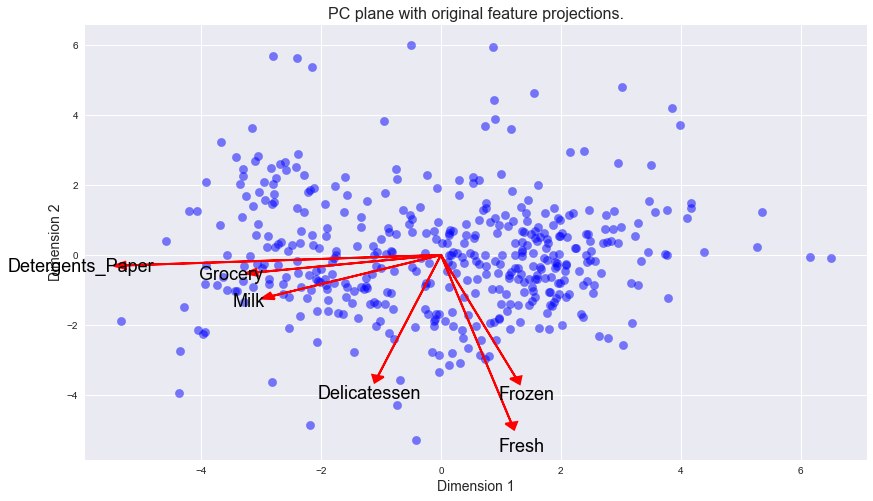

In [13]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:** The advantages to using a K-Means clustering algorithm is, it is Fast, Scalable, Efficient and Easy. It does a good job when the clusters are well defined i.e. when the clusters are separated enough. 

The Gaussian Mixture Model clustering algorithm works well when we have some impurity in the cluster. If we are uncertain about the data points where they belong or to which group, we use this method. It uses probability of a sample to determine the feasibility of it belonging to a cluster. It can use more parameters to separate the clusters like sigma, pi, mu etc. It works well with high degree equations to separate the data. The Gaussian algorithm can separate the cluster in any form and works well with non-linear geometric distributions like circle, parabole, curved line etc.

I think Gaussian Mixture clusterin algorithm would work better for the scatter plot given above. As there is no distinct clusters can be seen in the above plot, so gaussian algorithm would be the best to separate the data.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [14]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = GaussianMixture(n_components = 2, random_state = 30)
clusterer.fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen

score = silhouette_score(reduced_data, preds)
print "Silhouette Score:", score

Silhouette Score: 0.421916846463


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:** I manually chack the value of n_clusters from 2 to 11 and from the values obtained below, it seems that 2 Clusters has the best Silhouette Score i.e 42.19%

The other values I calculated are:

2 Clusters = Silhouette Score: 0.421916846463

3 Clusters = Silhouette Score: 0.37420184754

4 Clusters = Silhouette Score: 0.339258503731

5 Clusters = Silhouette Score: 0.271914760583

6 Clusters = Silhouette Score: 0.281521239128

7 Clusters = Silhouette Score: 0.331670506597

8 Clusters = Silhouette Score: 0.313770749388

9 Clusters = Silhouette Score: 0.314528045089

10 Clusters = Silhouette Score: 0.278178051716


### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

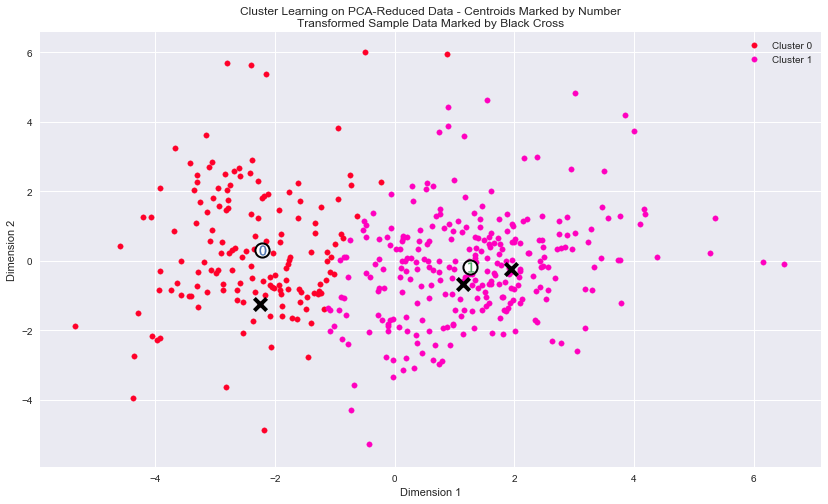

In [15]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


Value of True Centers:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,3552.0,7837.0,12219.0,870.0,4696.0,962.0
Segment 1,8953.0,2114.0,2765.0,2075.0,353.0,732.0



Original Data Statistics:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000



Dataset statistics after Outliers removed:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,12089.372414,5788.103448,7911.158621,3096.126437,2848.473563,1536.797701
std,12662.796341,7374.172350,9365.740973,4873.769559,4679.364623,2833.363881
min,3.000000,112.000000,218.000000,25.000000,3.000000,3.000000
25%,3208.000000,1579.500000,2156.000000,770.500000,260.000000,411.500000
50%,8565.000000,3634.000000,4757.000000,1541.000000,813.000000,967.000000
75%,16934.500000,7168.000000,10665.500000,3559.500000,3935.000000,1825.500000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000



Value of Segment(0 and 1) in Percentage:


           Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0   28.1  78.7     80.3    31.0              80.3          50.0
Segment 1   52.5  34.4     34.4    58.4              32.2          41.4

Median Values of True Centers:


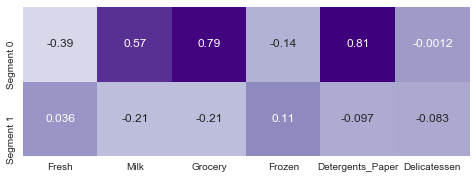

In [16]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

print "Value of True Centers:" 
# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

print"\nOriginal Data Statistics:"
display(data.describe())

print "\nDataset statistics after Outliers removed:"
display(np.exp(good_data).describe())

print "\nValue of Segment(0 and 1) in Percentage:"
newdata = data.append(true_centers)
percent = 100. * newdata.rank(axis=0, pct=True).loc[['Segment 0', 'Segment 1']].round(decimals=3)
print"\n"
print percent

print "\nMedian Values of True Centers:"
sns.heatmap((true_centers-data.median())/data.std(ddof=0),square=True, annot=True, cbar=False, cmap="Purples" )


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:** Segment/ Cluster 0: The customers are spending most on Grocery and Milk. They are spending on Detergents Paper and Fresh in almost equal amount. So it seems like some retail store/ super market. From the heatmap above we can see that Grocery, Milk and Detergent Papers are above median.

Segment/ Cluster 1:  The customers are spending most on Fresh Food and then on Grocery, Frozen and Milk.  So it could be some restaurant/cafe. Here Fresh and Frozen only seems to be above the median value.

On comparing the statistics above we can see that after removing the 5 major Outliers the value of Features has improve slightly.



### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [17]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1


**Answer:** From the Table above: 

Segment/Cluster:0 is selling lots of Grocery and then Milk. Then Detergents Paper and Fresh Food. So it seems like some Retail Store.

Segment/Cluster:1 is selling lots of Fresh Food and then Grocery. It is selling Milk and Frozen Food almost in equal amount. So, it seems more like some Restaurant/ Cafe.

----------

On Running the code above:

After analyzing the Sample Points and Clusters. The Sample Point 0 is Cluster 0, which I predict as a Retail Store and Sample Point 1 is Cluster 1 which I predict as a Restaurant/ Cafe.

----------

On Comparing with Data given in Question 1:

Sample point 0 predicted to be in Cluster 0 : I use Index = 12 in question 1 and predict it as Restaurant and the prediction from the cluster model it seems more like a Reatil Store. So my prediction was wrong.

Sample point 1 predicted to be in Cluster 1 : I use Index = 50 for this, which I predict was some Cold Storage which stores frozen fish/meat and other frozen food. But, from the data obtained from Q8, it seems more like a Restaurant/Cafe. So my prediction was wrong.

Sample point 2 predicted to be in Cluster 1: I use Index = 150 for this and I predict as Green Grocery shop/ Restaurant. From the scattered plot it we can see that it is selling lots of fresh food. So it seems like some Green Grocery shop/ Restaurant as well. So, my prediction was correct.





## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:** The clusters actually represents two main customer types. The Cluster 1 represents some restaurant/ cafe which has got lost of fresh food and the Cluster 0 represents some supermarket which sells lost of various items. 

So it seems like the customers from Cluster:1 would prefer 5 days delivery as they prefer Fresh Food and they prefer to  keep regular supply of it to keep food as fresh as possible, so they may not react positively to the changes in delivery service. On the other hand, Cluster:0 represents some Supermarket, so they may prefer to keep items in stock. Hence they might be good with 3 days delivery.

The A/B testing is about giving two choices to the customers, to analyze which choice they would prefer more. The company can launch some subscription service for the delivery and can see to which service customers are subscribing more. A for 5 days delivery and B for 3 days delivery. The company may have to run A/B test for atleast a week or two to analyze the habits of the customers and then they can decide which service would be good for which customer.  However, the A/B test can also be unpredictable, like during the holiday season, when the requirements of the people changes like during christmas and other festivals.

[A/B testing experiment performed on small samples from the population, just large enough to get statistically significant results. For it to be effective, the experiment group (A) has to be highly similar to the control group (B).]

The A/B test may not be prectical for a big population. For example, it may not be applicable for the customers living in different countries. As different countries have different cultures and eating habits. People from one country may prefer fresh food and people from another country might prefer preserved food. Even in the same country people of different states have different lifestyle, we can even consider rural and urban areas.



### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:** First we will use unsupervised learning algorithm like Gaussian Mixture Model clustering algorithm (GMM), to determine the new feature in the cluster and we will name it as Customer Segment. We are actually classifying new customers into a new feature using GMM.

Then we can add new data points for each customer and by using supervised learning algorithm like Logistic Regression, K-NN or SVM to predict new customers based on their estimated product spending.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

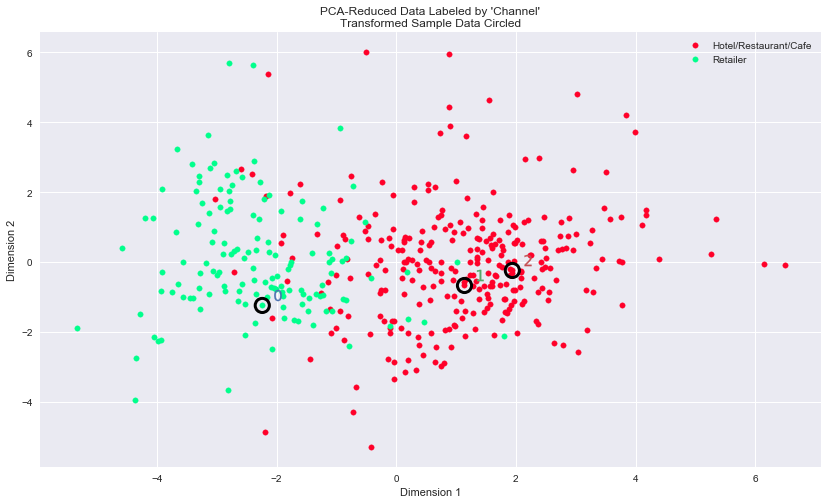

In [18]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:** The number of clusters we obtain from GMM matches the number of channels which is 2, so the clustering algorithm did quite well. It wasn't able to capture some of the data points of Hotel/Restaurant/Cafe, which seems to be scattered quite a lot.

We can see the two clusters red and green, where the red seems to be slightly overlapping with green. We can consider Red Cluster as a purely Hotels/Restaurants/Cafes, as it has got very few green points in it which can be ignored.

The classifications seems different than my previous assumptions. I considered Point 0 as a Fresh Food Market/ Restaurant, but it is Retailer in the above plot. The Point 1, I consider it as a Frozen Food store, which turn out to be a restaurant. The Point 2, I predict as a Restaurant and it is Restaurant in the above plot as well.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.